<a href="https://www.kaggle.com/code/ishank2005/cat-vs-dog-using-augmented-data?scriptVersionId=298757294" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import cv2
import os
import random
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation


2026-02-19 16:06:58.601618: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771517218.818262      24 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771517218.876008      24 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1771517219.371038      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771517219.371092      24 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1771517219.371097      24 computation_placer.cc:177] computation placer alr

# Load Image:

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("chetankv/dogs-cats-images")

print("Path to dataset files:", path)
categories = ['cats','dogs']

Path to dataset files: /kaggle/input/datasets/chetankv/dogs-cats-images


In [3]:
my_dir = "/kaggle/input/datasets/chetankv/dogs-cats-images/dataset/training_set"

In [4]:
data = []
for i in categories:
    folder_path = os.path.join(my_dir,i)
    if i == 'cats':
        label=0
    else:
        label=1
        for j in os.listdir(folder_path):
            img_path = os.path.join(folder_path,j)
            img = cv2.imread(img_path)
            img = cv2.resize(img,(150,150))
            data.append([img,label])

In [5]:
random.shuffle(data)


In [6]:
X = []
y = []
for i in data:

    X.append(i[0])
    y.append(i[1])

X = np.array(X)
y = np.array(y)

In [7]:
X.shape
X = X/255

# Building the Model:

In [8]:
# Three Convolutional Layers and Two main Layers:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))  # Filter Size of (3,3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    # Pool size refers to the single block it becomes so (2,2) because a single kernel output in refrenve to  Stride 2

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1771517277.913566      24 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15511 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [9]:
# Flatten to Convert Image into 1D form from 3D:
model.add(Flatten())

# Main layers(2):
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


# Compile and Train the CNN model:

In [10]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [11]:
model.fit(X,y,epochs=5,validation_split=0.1)

Epoch 1/5


I0000 00:00:1771517283.932300      65 service.cc:152] XLA service 0x79eecc006740 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1771517283.932347      65 service.cc:160]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1771517284.395273      65 cuda_dnn.cc:529] Loaded cuDNN version 91002


 13/113 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9006 - loss: 0.1684

I0000 00:00:1771517288.021548      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


113/113 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.9810 - loss: 0.0322 - val_accuracy: 1.0000 - val_loss: 7.9931e-08
Epoch 2/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 2.3102e-06 - val_accuracy: 1.0000 - val_loss: 4.1865e-09
Epoch 3/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 3.8176e-07 - val_accuracy: 1.0000 - val_loss: 2.1266e-09
Epoch 4/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 5.0692e-07 - val_accuracy: 1.0000 - val_loss: 1.1372e-09
Epoch 5/5
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 1.0000 - loss: 1.9975e-07 - val_accuracy: 1.0000 - val_loss: 9.0580e-10


# Applying Data Augmentation to Get More Data:

In [12]:
batch_size = 16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/kaggle/input/datasets/chetankv/dogs-cats-images/dataset/training_set',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/kaggle/input/datasets/chetankv/dogs-cats-images/dataset/test_set',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)


Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Building the CNN Model:

In [13]:
# Three Convolutional Layers and Two main Layers:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150,150,3)))  # Filter Size of (3,3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))    # Pool size refers to the single block it becomes so (2,2) because a single kernel output in refrenve to  Stride 2

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

In [14]:
# Flatten to Convert Image into 1D form from 3D:
model.add(Flatten())

# Main layers(2):
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))


In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 148, 148, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 72, 72, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 34, 34, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9248)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       591,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,393 (2.33 MB)

 Trainable params: 611,393 (2.33 MB)

 Non-trainable params: 0 (0.00 B)

# Compile and Train the Model:

In [16]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0.00001,
    patience=5,
    verbose=1,
    baseline=None,
    restore_best_weights=True
)

In [18]:
history = model.fit(
    train_generator,
    steps_per_epoch=2000//batch_size,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=800//batch_size,
    callbacks=callback
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 26s 181ms/step - accuracy: 0.5286 - loss: 0.7059 - val_accuracy: 0.5987 - val_loss: 0.6898
Epoch 2/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 20s 164ms/step - accuracy: 0.5489 - loss: 0.6911 - val_accuracy: 0.5500 - val_loss: 0.6703
Epoch 3/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 154ms/step - accuracy: 0.5837 - loss: 0.6820 - val_accuracy: 0.6463 - val_loss: 0.6451
Epoch 4/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 148ms/step - accuracy: 0.6485 - loss: 0.6417 - val_accuracy: 0.6375 - val_loss: 0.6322
Epoch 5/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 19s 149ms/step - accuracy: 0.6316 - loss: 0.6355 - val_accuracy: 0.6875 - val_loss: 0.5917
Epoch 6/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.6672 - loss: 0.6151 - val_accuracy: 0.7362 - val_loss: 0.5475
Epoch 7/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 146ms/step - accuracy: 0.6734 - loss: 0.5859 - val_accuracy: 0.7163 - val_loss: 0.5640
Epoch 8/25
125/125 ━━━━━━━━━━━━━━━━━━━━ 18s 141ms/step - accuracy: 0.6882 - loss: 0

# Let's check our models accuracy on 10 images 5 cat and 5 dogs:

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step


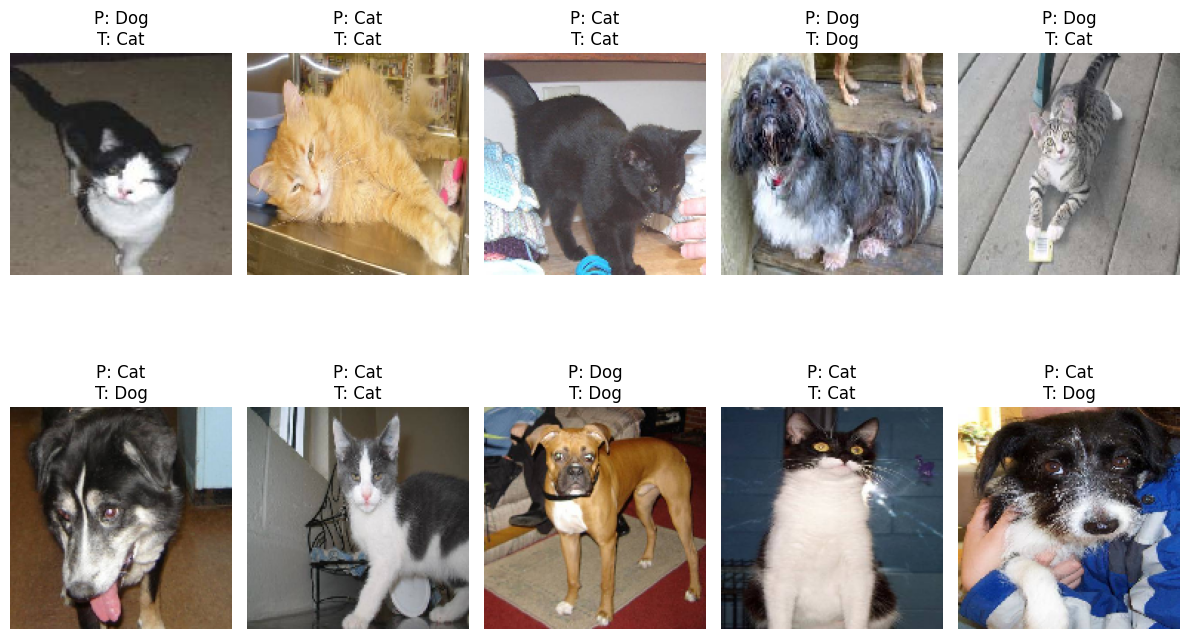

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Get one batch from validation generator
images, labels = next(validation_generator)

# Take first 10 images
images = images[:10]
labels = labels[:10]

# Predict
predictions = model.predict(images)

plt.figure(figsize=(12,8))

for i in range(10):
    plt.subplot(2,5,i+1)
    
    plt.imshow(images[i])
    plt.axis('off')
    
    # Since sigmoid output
    pred_label = "Dog" if predictions[i] > 0.5 else "Cat"
    true_label = "Dog" if labels[i] == 1 else "Cat"
    
    plt.title(f"P: {pred_label}\nT: {true_label}")

plt.tight_layout()
plt.show()


**I think our model is performing very well**